In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__,keras.__version__

('2.0.0', '2.2.4-tf')

# load data

In [38]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [39]:
X_train_full.shape,y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [40]:
type(y_train_full), X_train_full.dtype

(numpy.ndarray, dtype('uint8'))

In [41]:
X_train_full[1][0]

array([  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
        54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [42]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [43]:
# train-valid-split and scaling
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

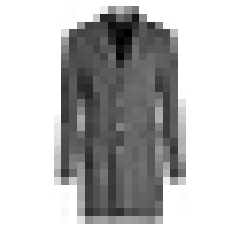

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[16], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[16]]

'Coat'

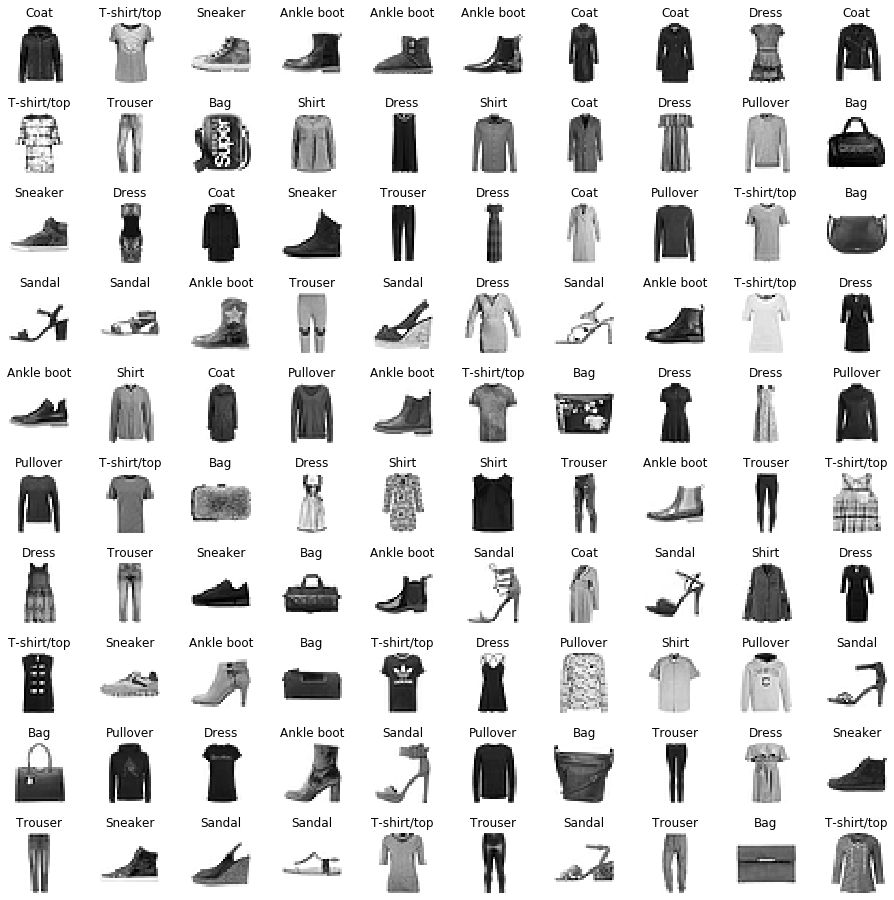

In [12]:
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols*1.6, n_rows*1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Model

In [13]:
model = keras.models.Sequential() # Sequential Model
model.add(keras.layers.Flatten(input_shape=[28, 28])) 
# 如果已经是2D的数据（tabular），比如有8列（即8个特征），可以直接：
# model.add(keras.layers.Dense(300, activation="relu"), input_shape=[8])
# 把input data展平成1d array  ==> .shape(-1,1)
# 也可以用：model.add(keras.layers.InputLayer(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#### 也可以用下面的方式建立Sequential Model

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary() 
# None 表示batch size
# 参数量：235500 = 784*300+300（加上bias项）

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
# !pip install pydot graphviz
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [20]:
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [23]:
weights, biases = hidden1.get_weights()
weights.shape,biases.shape

((784, 300), (300,))

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# loss function
# label是0-9稀疏的，用sparse_categorical_crossentropy 
# 如果是onehot后的，可以用categorical_crossentropy

# optimizer
# 'sgd'默认学习率为0.01
# 如果要自己指定学习率，用optimizer=keras.optimizers.SGD(lr=0.01)

# 等价于：
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [44]:
X_train.shape,y_train.shape,X_valid.shape, y_valid.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,))

In [51]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

# 如果不显式传入验证集validation_data=(X_valid, y_valid)，也可以用划分一个比例为 validation_split=0.1

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 82us/sample - loss: 0.2881 - sparse_categorical_accuracy: 0.8948 - val_loss: 0.2896 - val_sparse_categorical_accuracy: 0.8962
Epoch 2/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.2855 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.2876 - val_sparse_categorical_accuracy: 0.8952
Epoch 3/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.2833 - sparse_categorical_accuracy: 0.8963 - val_loss: 0.2870 - val_sparse_categorical_accuracy: 0.8952
Epoch 4/30
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2806 - sparse_categorical_accuracy: 0.8983 - val_loss: 0.2864 - val_sparse_categorical_accuracy: 0.8986
Epoch 5/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.2781 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.2843 - val_sparse_categorical_accuracy: 0.8952
Epoch 6/30
55000

In [47]:
history.params

{'batch_size': 32,
 'epochs': 6,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy']}

In [54]:
history.history

{'loss': [0.28806920812780207,
  0.28547112113995987,
  0.28328303028670226,
  0.2806281802805987,
  0.27813127302039753,
  0.2758422512054443,
  0.27368519019863824,
  0.27157658972306686,
  0.26967900009805507,
  0.26691120736598967,
  0.2651278020219369,
  0.2628682937849652,
  0.2609150293957103,
  0.2591893453836441,
  0.25718037630644713,
  0.25510342030958694,
  0.253534061850201,
  0.2514964372374795,
  0.24959073416969993,
  0.24759925574389371,
  0.24588484860767018,
  0.24392828390164809,
  0.242332095869021,
  0.24038405280763453,
  0.23898661380897868,
  0.23713833641138943,
  0.23541028656092558,
  0.2339800105268305,
  0.23245450839996337,
  0.23021862834583628],
 'sparse_categorical_accuracy': [0.89476365,
  0.8958727,
  0.8962727,
  0.8983273,
  0.89836365,
  0.89887273,
  0.9000546,
  0.90098184,
  0.9016727,
  0.9033818,
  0.9030727,
  0.9042909,
  0.90476364,
  0.9053818,
  0.9064364,
  0.9066182,
  0.90763634,
  0.9092,
  0.9094909,
  0.9105091,
  0.91138184,
  0.9

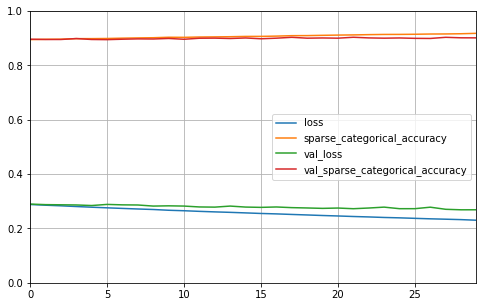

In [52]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.31645622794032097, 0.8853]

In [57]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.007, 0.   , 0.016, 0.   ,
        0.977],
       [0.   , 0.   , 0.993, 0.   , 0.006, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.169, 0.   , 0.019, 0.004, 0.007, 0.   , 0.799, 0.   , 0.001,
        0.   ]], dtype=float32)

In [58]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6])

In [60]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [61]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

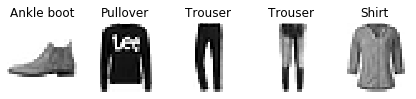

In [63]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# MLP REGRESSION

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

In [72]:
X_train.shape[1:]

(8,)

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 66us/sample - loss: 1.6321 - val_loss: 1.5903
Epoch 2/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.7124 - val_loss: 0.6539
Epoch 3/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6348 - val_loss: 0.6039
Epoch 4/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5983 - val_loss: 0.5738
Epoch 5/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5713 - val_loss: 0.5406
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5482 - val_loss: 0.5221
Epoch 7/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.5298 - val_loss: 0.4965
Epoch 8/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5138 - val_loss: 0.4843
Epoch 9/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5005 - val_l

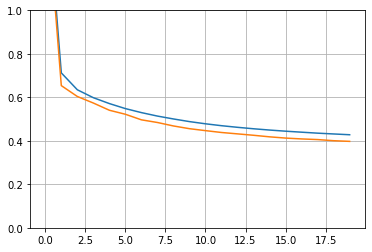

In [69]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# wide&deep with Functional API

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

<img src=./pics/widedeep.png width=500px>

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 30)           930         dense_18[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_19[0][0]               

In [74]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 83us/sample - loss: 1.8716 - val_loss: 2.0992
Epoch 2/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.6590 - val_loss: 0.8409
Epoch 3/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5956 - val_loss: 0.6495
Epoch 4/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5629 - val_loss: 0.6644
Epoch 5/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5400 - val_loss: 0.6005
Epoch 6/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5171 - val_loss: 0.8458
Epoch 7/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5058 - val_loss: 0.4805
Epoch 8/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4876 - val_loss: 0.5796
Epoch 9/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4792 - val_l

In [75]:
# 如果我们想用不同的特征分别输入wide和deep部分，我们可以分别定义input
# 比如0-4进wide，2-7进deep
np.random.seed(42)
tf.random.set_seed(42)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

<img src=./pics/wd2.png width=500px>

In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 77us/sample - loss: 1.8095 - val_loss: 1.4409
Epoch 2/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.6798 - val_loss: 0.6123
Epoch 3/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5957 - val_loss: 0.5618
Epoch 4/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5580 - val_loss: 0.5514
Epoch 5/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5331 - val_loss: 0.5073
Epoch 6/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5124 - val_loss: 0.4860
Epoch 7/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4972 - val_loss: 0.4631
Epoch 8/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4834 - val_loss: 0.4514
Epoch 9/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4746 - val_l

# Multi Task

多输出，多目标的问题

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

<img src=./pics/multioutput.png width=500px>

In [78]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [79]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [80]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 136us/sample - loss: 2.1329 - main_output_loss: 1.9166 - aux_output_loss: 4.0719 - val_loss: 2.2885 - val_main_output_loss: 1.5657 - val_aux_output_loss: 8.7861
Epoch 2/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.8910 - main_output_loss: 0.6989 - aux_output_loss: 2.6202 - val_loss: 1.4258 - val_main_output_loss: 0.6285 - val_aux_output_loss: 8.5972
Epoch 3/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.7397 - main_output_loss: 0.6064 - aux_output_loss: 1.9374 - val_loss: 1.3894 - val_main_output_loss: 0.5941 - val_aux_output_loss: 8.5417
Epoch 4/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6746 - main_output_loss: 0.5684 - aux_output_loss: 1.6301 - val_loss: 1.3275 - val_main_output_loss: 0.6028 - val_aux_output_loss: 7.8451
Epoch 5/20
11610/11610 [==============================] - 1s 53us/

In [81]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Subclassing API

>This extra flexibility does come at a cost: your model’s architecture is hidden
within the call() method, so Keras cannot easily inspect it; it cannot save or
clone it; and when you call the summary() method, you only get a list of layers,
without any information on how they are connected to each other. Moreover,
Keras cannot check types and shapes ahead of time, and it is easier to make
mistakes. So unless you really need that extra flexibility, you should probably
stick to the Sequential API or the Functional API.



In [82]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [83]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 131us/sample - loss: 2.2968 - output_1_loss: 2.1826 - output_2_loss: 3.3166 - val_loss: 3.0093 - val_output_1_loss: 1.5519 - val_output_2_loss: 16.1139
Epoch 2/10
11610/11610 [==============================] - 1s 48us/sample - loss: 0.9760 - output_1_loss: 0.8529 - output_2_loss: 2.0834 - val_loss: 1.9290 - val_output_1_loss: 0.7524 - val_output_2_loss: 12.5119
Epoch 3/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.8288 - output_1_loss: 0.7270 - output_2_loss: 1.7431 - val_loss: 1.6768 - val_output_1_loss: 0.7256 - val_output_2_loss: 10.2305
Epoch 4/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.7637 - output_1_loss: 0.6744 - output_2_loss: 1.5665 - val_loss: 1.4544 - val_output_1_loss: 0.6860 - val_output_2_loss: 8.3638
Epoch 5/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.7227 - output_1_loss

In [85]:
model.summary()

Model: "wide_and_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             multiple                  210       
_________________________________________________________________
dense_26 (Dense)             multiple                  930       
_________________________________________________________________
dense_27 (Dense)             multiple                  36        
_________________________________________________________________
dense_28 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


# Saving and Restoring a Model

对于Sequential API 或者 Functional API，可以直接调用`.save`和`.load`方法，但是对于model subclassing，可以调用 `save_weights()`和`load_weights()`，剩下的就需要手动存储和恢复。

同时，对于训练周期长的模型，我们应当使用checkpoint，固定间隔存一下模型，防止中途故障而前功尽弃。


In [86]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 113us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/5
11610/11610 [==============================] - 1s 47us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/5
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/5
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/5
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5278 - val_loss: 0.5715
5160/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================

In [87]:
!mkdir model

In [89]:
model.save("model/my_keras_model.h5")
!ls model/

my_keras_model.h5


In [91]:
model2 = keras.models.load_model("model/my_keras_model.h5")

In [92]:
model.predict(X_new) == model2.predict(X_new)

array([[ True],
       [ True],
       [ True]])

In [93]:
model.save_weights("model/my_keras_weights.ckpt")

In [94]:
model.load_weights("model/my_keras_weights.ckpt")

# Callback

In [95]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [96]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

### 1. checkpoint

> Moreover, if you use a validation set during training, you can set
`save_best_only=True` when creating the ModelCheckpoint. In this case, it will
only save your model when its performance on the validation set is the best so far.

In [97]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("model/my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 81us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/10
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4586 - val_l

### 2. earlystopping

>It will interrupt training when it measures no progress on the validation
set for a number of epochs (defined by the patience argument), and it will
optionally roll back to the best model. You can combine both callbacks to save
checkpoints of your model (in case your computer crashes) and interrupt training
early when there is no more progress (to avoid wasting time and resources):

In [98]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 102us/sample - loss: 0.4388 - val_loss: 0.4122
Epoch 2/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4319 - val_loss: 0.4046
Epoch 3/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4256 - val_loss: 0.4065
Epoch 4/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4202 - val_loss: 0.3998
Epoch 5/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4157 - val_loss: 0.3970
Epoch 6/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4112 - val_loss: 0.3964
Epoch 7/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4072 - val_loss: 0.3807
Epoch 8/100
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4040 - val_loss: 0.3778
Epoch 9/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.40

In [99]:
# 自定义callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

# 还有更多方法：on_train_begin(), on_train_end()
# on_epoch_begin(), on_epoch_end(), on_batch_begin(), on_batch_end()
# 
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
11264/11610 [============================>.] - ETA: 0s - loss: 0.3456
val/train: 1.10
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3465 - val_loss: 0.3825


>you can implement `on_train_begin()`, `on_train_end()`,
`on_epoch_begin()`, `on_epoch_end()`, `on_batch_begin()`, and
`on_batch_end()`. Callbacks can also be used during evaluation and predictions,
should you ever need them (e.g., for debugging). For evaluation, you should
implement `on_test_begin()`, `on_test_end()`, `on_test_batch_begin()`, or
`on_test_batch_end()` (called by `evaluate()`), and for prediction you should
implement `on_predict_begin()`, `on_predict_end()`,
`on_predict_batch_begin()`, or `on_predict_batch_end()` (called by
`predict()`).

# TensorBoard

In [103]:
import os
root_logdir = os.path.join(os.curdir, "tf_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y%m%d_%H%M%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./tf_logs/run_20191206_092454'

In [104]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [105]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [108]:
X_train.shape # 8 features

(11610, 8)

In [109]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir) # 输入当前目录
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 75us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/30
11610/11610 [==============================] - 1s 45us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/30
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/30
11610/11610 [==============================] - 1s 50us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/30
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/30
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4586 - val_l

### 运行tensorboard 
进入TensorFlow的安装环境，终端输入：`tensorboard --logdir=./my_logs --port=6006` \
然后打开[localhost:6006](http://localhost:6006)即可。
或者使用jupyter的magic

In [125]:
%load_ext tensorboard
%tensorboard --logdir=./tf_logs --port=6020

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [121]:
run_logdir2 = get_run_logdir()
run_logdir2

'./tf_logs/run_20191206_094613'

In [122]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [123]:
# LR = 0.05
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [124]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),

                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.7860 - val_loss: 3.9608
Epoch 2/30
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4406 - val_loss: 19.3299
Epoch 3/30
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3807 - val_loss: 1.9256
Epoch 4/30
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4085 - val_loss: 0.3695
Epoch 5/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3784 - val_loss: 0.3267
Epoch 6/30
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3587 - val_loss: 4.5474
Epoch 7/30
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3898 - val_loss: 0.3186
Epoch 8/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3448 - val_loss: 0.3265
Epoch 9/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3374 - val_

In [126]:
# tensorboard的其他logging参数选择
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



我们可以用TF中的低阶API，`tf.summary`去自定义可被TensorBoard可视化的数据

In [127]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Hyperparameter Tuning

调参，random search，先在一个大范围里找，再到找到个参数范围周边的小范围里找；
也可以用贝叶斯优化，自动实现上面那个过程。
>Here are some Python libraries you can use to optimize hyperparameters:
- **[Hyperopt](https://github.com/hyperopt/hyperopt)** \
A popular library for optimizing over all sorts of complex search spaces
(including real values, such as the learning rate, and discrete values, such as
the number of layers).
- **[Hyperas](https://github.com/maxpumperla/hyperas), [kopt](https://github.com/Avsecz/kopt), or [Talos](https://github.com/autonomio/talos)** \
Useful libraries for optimizing hyperparameters for Keras models (the first
two are based on Hyperopt).
- **[Keras Tuner](https://homl.info/kerastuner)** \
An easy-to-use hyperparameter optimization library by Google for Keras
models, with a hosted service for visualization and analysis.
- **[Scikit-Optimize (skopt)](https://scikit-optimize.github.io/)** \
A general-purpose optimization library. The BayesSearchCV class performs
Bayesian optimization using an interface similar to GridSearchCV.
- **[Spearmint](https://github.com/JasperSnoek/spearmint)** \
A Bayesian optimization library.
- **[Hyperband](https://github.com/zygmuntz/hyperband)** \
A fast hyperparameter tuning library based on the recent [Hyperband paper
by Lisha Li et al.](https://arxiv.org/abs/1603.06560)
- **[Sklearn-Deap](https://github.com/rsteca/sklearn-deap)** \
A hyperparameter optimization library based on evolutionary algorithms,
with a GridSearchCV-like interface.

In [128]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [129]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1)) # univariate regression 
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [130]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
# Now we can use this object like a regular Scikit-Learn regressor

In [131]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 81us/sample - loss: 1.1815 - val_loss: 20.7837
Epoch 2/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.7013 - val_loss: 0.6646
Epoch 3/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5197 - val_loss: 0.5974
Epoch 4/100
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4811 - val_loss: 0.5292
Epoch 5/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4565 - val_loss: 0.4813
Epoch 6/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4393 - val_loss: 0.4501
Epoch 7/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4283 - val_loss: 0.4231
Epoch 8/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4205 - val_loss: 0.4072
Epoch 9/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.41

In [135]:
mse_test = keras_reg.score(X_test, y_test, verbose=2)

5160/1 - 0s - loss: 0.2821


In [136]:
y_pred = keras_reg.predict(X_new)
y_pred

array([0.6270607, 1.7558155, 3.7607713], dtype=float32)

In [137]:
np.random.seed(42)
tf.random.set_seed(42)

In [142]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=20,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] learning_rate=0.0006665773642619745, n_hidden=0, n_neurons=36 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 1s 96us/sample - loss: 4.7356 - val_loss: 15.7269
Epoch 2/10
7740/7740 [==============================] - 0s 48us/sample - loss: 2.7328 - val_loss: 5.7695
Epoch 3/10
7740/7740 [==============================] - 0s 46us/sample - loss: 1.7538 - val_loss: 2.3798
Epoch 4/10
7740/7740 [==============================] - 0s 46us/sample - loss: 1.2520 - val_loss: 1.1725
Epoch 5/10
7740/7740 [==============================] - 0s 49us/sample - loss: 0.9875 - val_loss: 0.8539
Epoch 6/10
7740/7740 [==============================] - 0s 49us/sample - loss: 0.8453 - val_loss: 0.7723
Epoch 7/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7658 - val_loss: 0.7771
Epoch 8/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7201 - val_loss: 0.7795
Epoch 9/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6920 - val_loss: 0.8062
Epoch 10/10
7740/7740 [==============================] - 0s 55us/

[CV]  learning_rate=0.0006665773642619745, n_hidden=0, n_neurons=36, total=   4.6s
[CV] learning_rate=0.0006665773642619745, n_hidden=0, n_neurons=36 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


7740/7740 [==============================] - 1s 157us/sample - loss: 5.2641 - val_loss: 8.1652
Epoch 2/10
7740/7740 [==============================] - 0s 62us/sample - loss: 3.2280 - val_loss: 4.7453
Epoch 3/10
7740/7740 [==============================] - 0s 61us/sample - loss: 2.1586 - val_loss: 2.7438
Epoch 4/10
7740/7740 [==============================] - 0s 60us/sample - loss: 1.5878 - val_loss: 1.6387
Epoch 5/10
7740/7740 [==============================] - 0s 60us/sample - loss: 1.2768 - val_loss: 1.1260
Epoch 6/10
7740/7740 [==============================] - 1s 65us/sample - loss: 1.1021 - val_loss: 1.0088
Epoch 7/10
7740/7740 [==============================] - 1s 65us/sample - loss: 0.9989 - val_loss: 1.1729
Epoch 8/10
7740/7740 [==============================] - 0s 51us/sample - loss: 0.9339 - val_loss: 1.5408
Epoch 9/10
7740/7740 [==============================] - 0s 49us/sample - loss: 0.8898 - val_loss: 2.0608
Epoch 10/10
7740/7740 [==============================] - 0s 49us/

[CV]  learning_rate=0.0006665773642619745, n_hidden=0, n_neurons=36, total=   5.5s
[CV] learning_rate=0.0006665773642619745, n_hidden=0, n_neurons=36 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 78us/sample - loss: 7.6851 - val_loss: 8.1739
Epoch 2/10
7740/7740 [==============================] - 0s 51us/sample - loss: 4.1079 - val_loss: 4.0010
Epoch 3/10
7740/7740 [==============================] - 0s 56us/sample - loss: 2.4098 - val_loss: 2.2185
Epoch 4/10
7740/7740 [==============================] - 0s 60us/sample - loss: 1.5625 - val_loss: 1.4324
Epoch 5/10
7740/7740 [==============================] - 0s 52us/sample - loss: 1.1261 - val_loss: 1.0717
Epoch 6/10
7740/7740 [==============================] - 0s 48us/sample - loss: 0.8952 - val_loss: 0.9238
Epoch 7/10
7740/7740 [==============================] - 0s 58us/sample - loss: 0.7707 - val_loss: 0.8253
Epoch 8/10
7740/7740 [==============================] - 0s 51us

[CV]  learning_rate=0.0006665773642619745, n_hidden=0, n_neurons=36, total=   4.5s
[CV] learning_rate=0.0006943739671561459, n_hidden=3, n_neurons=2 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 94us/sample - loss: 4.4455 - val_loss: 3.4052
Epoch 2/10
7740/7740 [==============================] - 0s 58us/sample - loss: 2.9240 - val_loss: 2.3648
Epoch 3/10
7740/7740 [==============================] - 0s 56us/sample - loss: 2.1469 - val_loss: 1.8386
Epoch 4/10
7740/7740 [==============================] - 0s 57us/sample - loss: 1.7502 - val_loss: 1.5738
Epoch 5/10
7740/7740 [==============================] - 0s 55us/sample - loss: 1.5476 - val_loss: 1.4409
Epoch 6/10
7740/7740 [==============================] - 0s 54us/sample - loss: 1.4440 - val_loss: 1.3751
Epoch 7/10
7740/7740 [==============================] - 0s 56us/sample - loss: 1.3912 - val_loss: 1.3427
Epoch 8/10
7740/7740 [==============================] - 0s 56us

[CV]  learning_rate=0.0006943739671561459, n_hidden=3, n_neurons=2, total=   4.9s
[CV] learning_rate=0.0006943739671561459, n_hidden=3, n_neurons=2 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 99us/sample - loss: 4.8671 - val_loss: 3.4119
Epoch 2/10
7740/7740 [==============================] - 0s 61us/sample - loss: 2.9810 - val_loss: 2.3100
Epoch 3/10
7740/7740 [==============================] - 0s 61us/sample - loss: 2.1542 - val_loss: 1.7839
Epoch 4/10
7740/7740 [==============================] - 0s 59us/sample - loss: 1.7465 - val_loss: 1.5271
Epoch 5/10
7740/7740 [==============================] - 0s 61us/sample - loss: 1.5406 - val_loss: 1.4006
Epoch 6/10
7740/7740 [==============================] - 0s 56us/sample - loss: 1.4349 - val_loss: 1.3377
Epoch 7/10
7740/7740 [==============================] - 0s 56us/sample - loss: 1.3788 - val_loss: 1.3048
Epoch 8/10
7740/7740 [==============================] - 0s 55us/

[CV]  learning_rate=0.0006943739671561459, n_hidden=3, n_neurons=2, total=   5.1s
[CV] learning_rate=0.0006943739671561459, n_hidden=3, n_neurons=2 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 103us/sample - loss: 4.5357 - val_loss: 3.3814
Epoch 2/10
7740/7740 [==============================] - 0s 62us/sample - loss: 2.9707 - val_loss: 2.3352
Epoch 3/10
7740/7740 [==============================] - 0s 55us/sample - loss: 2.1709 - val_loss: 1.8115
Epoch 4/10
7740/7740 [==============================] - 0s 62us/sample - loss: 1.7628 - val_loss: 1.5517
Epoch 5/10
7740/7740 [==============================] - 0s 56us/sample - loss: 1.5545 - val_loss: 1.4243
Epoch 6/10
7740/7740 [==============================] - 0s 56us/sample - loss: 1.4482 - val_loss: 1.3630
Epoch 7/10
7740/7740 [==============================] - 1s 87us/sample - loss: 1.3939 - val_loss: 1.3345
Epoch 8/10
7740/7740 [==============================] - 1s 67us

[CV]  learning_rate=0.0006943739671561459, n_hidden=3, n_neurons=2, total=   5.4s
[CV] learning_rate=0.002125362451575068, n_hidden=1, n_neurons=4 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 80us/sample - loss: 2.3813 - val_loss: 1.6251
Epoch 2/10
7740/7740 [==============================] - 0s 47us/sample - loss: 0.9169 - val_loss: 0.9825
Epoch 3/10
7740/7740 [==============================] - 0s 47us/sample - loss: 0.7903 - val_loss: 0.8083
Epoch 4/10
7740/7740 [==============================] - 0s 48us/sample - loss: 0.7398 - val_loss: 0.7334
Epoch 5/10
7740/7740 [==============================] - 0s 51us/sample - loss: 0.7040 - val_loss: 0.6919
Epoch 6/10
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6740 - val_loss: 0.6579
Epoch 7/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.6486 - val_loss: 0.6307
Epoch 8/10
7740/7740 [==============================] - 0s 49us/

[CV]  learning_rate=0.002125362451575068, n_hidden=1, n_neurons=4, total=   4.4s
[CV] learning_rate=0.002125362451575068, n_hidden=1, n_neurons=4 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 105us/sample - loss: 2.6276 - val_loss: 4.5440
Epoch 2/10
7740/7740 [==============================] - 0s 52us/sample - loss: 1.1127 - val_loss: 4.2281
Epoch 3/10
7740/7740 [==============================] - 0s 62us/sample - loss: 0.7666 - val_loss: 2.6549
Epoch 4/10
7740/7740 [==============================] - 0s 49us/sample - loss: 0.6830 - val_loss: 1.3604
Epoch 5/10
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6416 - val_loss: 0.7232
Epoch 6/10
7740/7740 [==============================] - 0s 50us/sample - loss: 0.6093 - val_loss: 0.6928
Epoch 7/10
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5785 - val_loss: 0.6503
Epoch 8/10
7740/7740 [==============================] - 0s 61us/

[CV]  learning_rate=0.002125362451575068, n_hidden=1, n_neurons=4, total=   5.2s
[CV] learning_rate=0.002125362451575068, n_hidden=1, n_neurons=4 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 103us/sample - loss: 3.1296 - val_loss: 8.0424
Epoch 2/10
7740/7740 [==============================] - 1s 66us/sample - loss: 1.4536 - val_loss: 3.0710
Epoch 3/10
7740/7740 [==============================] - 0s 64us/sample - loss: 0.9159 - val_loss: 0.8613
Epoch 4/10
7740/7740 [==============================] - 0s 49us/sample - loss: 0.6973 - val_loss: 0.6401
Epoch 5/10
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6140 - val_loss: 0.5797
Epoch 6/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5668 - val_loss: 0.5647
Epoch 7/10
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5325 - val_loss: 0.5119
Epoch 8/10
7740/7740 [==============================] - 0s 41us/

[CV]  learning_rate=0.002125362451575068, n_hidden=1, n_neurons=4, total=   4.9s
[CV] learning_rate=0.0007027974317461211, n_hidden=2, n_neurons=18 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 78us/sample - loss: 3.1918 - val_loss: 9.7395
Epoch 2/10
7740/7740 [==============================] - 0s 42us/sample - loss: 1.4660 - val_loss: 3.3375
Epoch 3/10
7740/7740 [==============================] - 0s 42us/sample - loss: 1.0622 - val_loss: 1.7783
Epoch 4/10
7740/7740 [==============================] - 0s 43us/sample - loss: 0.8866 - val_loss: 1.0550
Epoch 5/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.8021 - val_loss: 0.7584
Epoch 6/10
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7555 - val_loss: 0.6999
Epoch 7/10
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7269 - val_loss: 0.7155
Epoch 8/10
7740/7740 [==============================] - 0s 42us/s

[CV]  learning_rate=0.0007027974317461211, n_hidden=2, n_neurons=18, total=   3.9s
[CV] learning_rate=0.0007027974317461211, n_hidden=2, n_neurons=18 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 78us/sample - loss: 2.9172 - val_loss: 10.2378
Epoch 2/10
7740/7740 [==============================] - 0s 64us/sample - loss: 1.0801 - val_loss: 11.4266
Epoch 3/10
7740/7740 [==============================] - 0s 47us/sample - loss: 0.8152 - val_loss: 8.6413
Epoch 4/10
7740/7740 [==============================] - 0s 51us/sample - loss: 0.7239 - val_loss: 6.2408
Epoch 5/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6763 - val_loss: 4.2458
Epoch 6/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.6442 - val_loss: 2.9248
Epoch 7/10
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6195 - val_loss: 2.2052
Epoch 8/10
7740/7740 [==============================] - 0s 50

[CV]  learning_rate=0.0007027974317461211, n_hidden=2, n_neurons=18, total=   4.8s
[CV] learning_rate=0.0007027974317461211, n_hidden=2, n_neurons=18 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 109us/sample - loss: 3.8282 - val_loss: 3.9159
Epoch 2/10
7740/7740 [==============================] - 0s 48us/sample - loss: 1.8761 - val_loss: 1.4993
Epoch 3/10
7740/7740 [==============================] - 0s 52us/sample - loss: 1.2404 - val_loss: 1.0686
Epoch 4/10
7740/7740 [==============================] - 0s 49us/sample - loss: 1.0014 - val_loss: 0.8984
Epoch 5/10
7740/7740 [==============================] - 0s 44us/sample - loss: 0.8825 - val_loss: 0.8110
Epoch 6/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.8100 - val_loss: 0.8060
Epoch 7/10
7740/7740 [==============================] - 1s 69us/sample - loss: 0.7637 - val_loss: 0.7234
Epoch 8/10
7740/7740 [==============================] - 1s 73u

[CV]  learning_rate=0.0007027974317461211, n_hidden=2, n_neurons=18, total=   5.2s
[CV] learning_rate=0.010650914574384917, n_hidden=1, n_neurons=74 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 114us/sample - loss: 1.1761 - val_loss: 33.9872
Epoch 2/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6620 - val_loss: 1.8521
Epoch 3/10
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4749 - val_loss: 0.3955
Epoch 4/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4150 - val_loss: 0.3809
Epoch 5/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4002 - val_loss: 0.3694
Epoch 6/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4053 - val_loss: 0.3613
Epoch 7/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3805 - val_loss: 0.3543
Epoch 8/10
7740/7740 [==============================] - 0s 53

[CV]  learning_rate=0.010650914574384917, n_hidden=1, n_neurons=74, total=   5.1s
[CV] learning_rate=0.010650914574384917, n_hidden=1, n_neurons=74 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 97us/sample - loss: 0.8784 - val_loss: 1.3896
Epoch 2/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4794 - val_loss: 1.4797
Epoch 3/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4300 - val_loss: 0.4761
Epoch 4/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4089 - val_loss: 0.4161
Epoch 5/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3958 - val_loss: 0.5862
Epoch 6/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3867 - val_loss: 0.5295
Epoch 7/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.3808 - val_loss: 0.8357
Epoch 8/10
7740/7740 [==============================] - 1s 68us/

[CV]  learning_rate=0.010650914574384917, n_hidden=1, n_neurons=74, total=   5.1s
[CV] learning_rate=0.010650914574384917, n_hidden=1, n_neurons=74 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 89us/sample - loss: 1.1348 - val_loss: 8.4174
Epoch 2/10
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5260 - val_loss: 2.8487
Epoch 3/10
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4488 - val_loss: 0.3852
Epoch 4/10
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4254 - val_loss: 0.3747
Epoch 5/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4026 - val_loss: 0.3826
Epoch 6/10
7740/7740 [==============================] - 1s 75us/sample - loss: 0.3929 - val_loss: 0.3897
Epoch 7/10
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3852 - val_loss: 0.4001
Epoch 8/10
7740/7740 [==============================] - 0s 58us/

[CV]  learning_rate=0.010650914574384917, n_hidden=1, n_neurons=74, total=   4.7s
Train on 11610 samples, validate on 3870 samples
Epoch 1/10


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished


11610/11610 [==============================] - 1s 115us/sample - loss: 0.6896 - val_loss: 1.2840
Epoch 2/10
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4582 - val_loss: 13.7294
Epoch 3/10
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4835 - val_loss: 23.5138
Epoch 4/10
11610/11610 [==============================] - 1s 53us/sample - loss: 0.6090 - val_loss: 6.7577
Epoch 5/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4922 - val_loss: 210.2107
Epoch 6/10
11610/11610 [==============================] - 1s 57us/sample - loss: 1.6123 - val_loss: 1.6240
Epoch 7/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4249 - val_loss: 1.1051
Epoch 8/10
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4028 - val_loss: 2.3560
Epoch 9/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4205 - val_loss: 0.3590
Epoch 10/10
11610/11610 [==================

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x13c9cfda0>,
                   iid='warn', n_iter=5, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1416cf2b0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 1...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_t

In [143]:
rnd_search_cv.best_params_

{'learning_rate': 0.010650914574384917, 'n_hidden': 1, 'n_neurons': 74}

In [144]:
rnd_search_cv.best_score_

-0.37850301247491186

In [145]:
rnd_search_cv.best_estimator_

In [149]:
rnd_search_cv.score(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

-0.45045211874237356

In [151]:
model.evaluate(X_test, y_test,verbose=2)

5160/1 - 0s - loss: 0.2335


0.29257543914077816

## 调参：

- #### Number of Hidden Layers

越多模型拟合能力越强，但要注意过拟合。

- #### Number of Neurons per Hidden Layer

一般会是一个pyramid的结构，比如33=>200=>100=>10
但是研究发现，每一层一样的模型，效果不一定差，有时候反而更好，但是这样调参就只需调1个就可以了，不需要对每层的神经元个数分别调，会方便很多。但是取决于输入的数据集，有时候第一层会相比于后面的层设置得大一些。

一般会定义一个更大的网络，用早停或正则的策略去防止过拟合。

>Just like the number of layers, you can try increasing the number of neurons
gradually until the network starts overfitting. **But in practice, it’s often simpler
and more efficient to pick a model with more layers and neurons than you
actually need, then use early stopping and other regularization techniques to
prevent it from overfitting.** Vincent Vanhoucke, a scientist at Google, has
dubbed this the “stretch pants” approach: instead of wasting time looking for
pants that perfectly match your size, just use large stretch pants that will shrink
down to the right size. With this approach, you avoid bottleneck layers that
could ruin your model. 

- #### Learning Rate

最佳的学习率一般为最大学习率的一半，最大学习率是模型开始发散的学习率.
可以初始化一个1e-5 - 10的学习率序列(e.g., by exp(log(10)/500) to go from 10 to 10 in 500 iterations)，
分别对模型进行迭代训练。找到模型开始不收敛的那个学习率，一般是最佳学习率的10倍左右。

> The optimal learning rate depends on the other hyperparameters—especially the
batch size—so if you modify any hyperparameter, make sure to update the learning
rate as well.

- #### Optimizer

- #### Batch Size

大的batch size可以加速训练( computational parallelism)，一次并行训练更大的数据量..所以一些从业者推荐在GPU RAM支持的范围内尽量用更大的batch size，如8192.
但是，大的batch size会增加模型训练的不稳定性，使其泛化性变差（相比于小的batch size）。

2018年Yann LeCun 引用文章[Revisiting Small Batch Training for Deep Neural Networks](https://arxiv.org/abs/1804.07612)并指出，"Friends don’t let friends use mini-batches larger than 32"

这篇文章中的结论是：
>using small batches (from 2 to 32) was preferable because small batches led
to better models in less training time.

一些文章也指出，可以结合learning rate的warming up (i.e., starting training with a small learning rate, then ramping it up)，用很大的batch size进行训练。

>So, one strategy is to try to use a large batch size, using
learning rate warmup, and if training is unstable or the final performance is
disappointing, then try using a small batch size instead.

- #### Activation function

隐藏层中默认的relu一般就OK，输出层取决于任务。


## Reference

* 更多的调参实验：https://arxiv.org/abs/1803.09820
